In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [4]:
df.columns

Index(['Weight', 'Height'], dtype='object')

Text(0.5, 0, 'height')

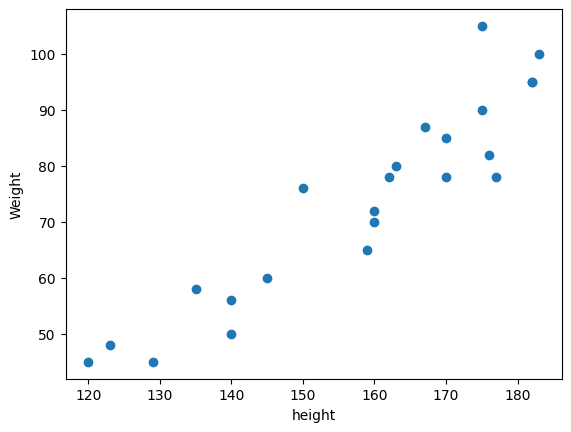

In [5]:
plt.scatter(df.Height,df.Weight)
plt.ylabel('Weight')
plt.xlabel('height')

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<Axes: >

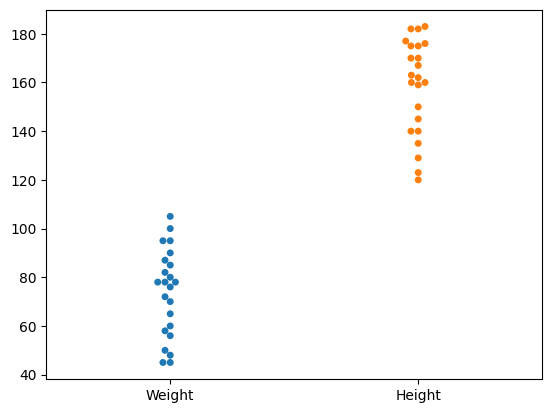

In [7]:
import seaborn as sns 

sns.swarmplot(df)

In [8]:
X = df[['Height']]
Y = df.drop(columns=['Height'])


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [10]:
X_train.shape 

(18, 1)

In [11]:
Y_train.shape

(18, 1)

In [12]:
X_test.shape

(5, 1)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_test.std()

np.float64(1.2308424229030916)

In [15]:
Regressor = LinearRegression()

In [16]:
Regressor.fit(X_train,Y_train)

LinearRegression()

In [17]:
answers = Regressor.predict(X_test)

In [18]:
r2_score(Y_test,answers)

0.6981504561563971

In [19]:
print(f"{mean_squared_error(Y_test,answers)} and {root_mean_squared_error(Y_test,answers)}")

83.23803021031195 and 9.123487831433325


In [20]:
scaler.transform([[172]])

c:\Users\User\Desktop\Dataset\data\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.80441842]])

In [21]:
Regressor.predict([[0.80441842]])

array([[87.72408877]])

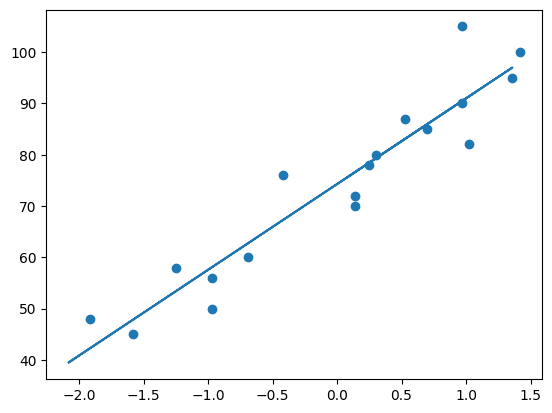

In [22]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,Regressor.predict(X_test))

In [23]:
import statsmodels.api as sm

In [24]:
model = sm.OLS(Y_train,X_train).fit()

In [25]:
prediction = model.predict(X_test)

In [26]:
prediction

array([ 18.08296999,  11.59164743, -34.77494229,  22.71962896,
         1.39099769])

In [27]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.048
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.8558
Date:                Sat, 21 Dec 2024   Prob (F-statistic):                       0.368
Time:                        12:52:34   Log-Likelihood:                         -103.14
No. Observations:                  18   AIC:                                      208.3
Df Residuals:                      17   BIC:                                      209.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\User\Desktop\Dataset\data\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
